# Import libraries

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array
import keras.backend as K
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load data for testing

In [2]:
test_data_genarator = ImageDataGenerator(rescale=1./255)
test_set = test_data_genarator.flow_from_directory('./test',
                                                   shuffle=False,
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 26 images belonging to 2 classes.


# Create model graph and load weights

In [3]:
K.clear_session()

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu',kernel_initializer='lecun_uniform'))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer='lecun_uniform'))
model.add(Dense(units = 32, activation = 'relu',kernel_initializer='lecun_uniform'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.load_weights('./checkpoints/New_gender_pred_model(.8647).hdf5')

model.compile(optimizer=eval('Adam(lr=0.001)'),
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Load images for testing

In [4]:
def try_me(path):
    all_images = []
    for dirpath,_,filenames in os.walk(path):
        for f in filenames:
            absolute_file_path = os.path.abspath(os.path.join(dirpath, f))
            img = load_img(absolute_file_path, color_mode='rgb', target_size = (64,64,3))
            img_arr = np.expand_dims(img_to_array(img), axis=0)
            datagen = ImageDataGenerator(rescale=1./255)
            for batch in datagen.flow(img_arr, batch_size=1):
                all_images.append(batch.tolist())
                break
    return np.array(all_images).reshape(-1,64,64,3)

# Lets view some results

C:\Anaconda\envs\kerasme\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


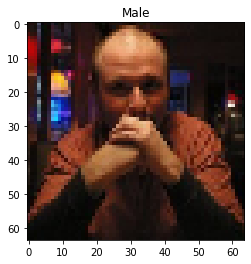

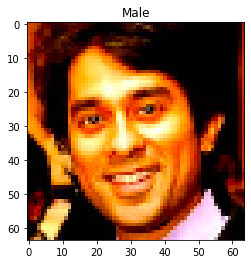

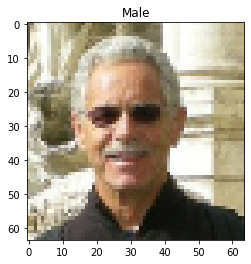

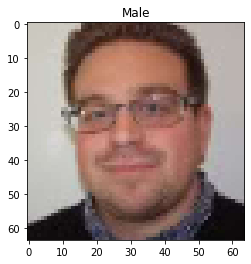

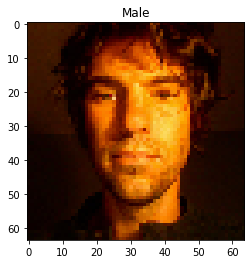

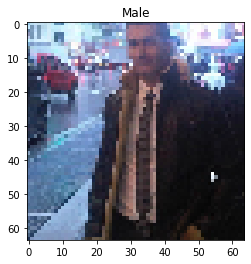

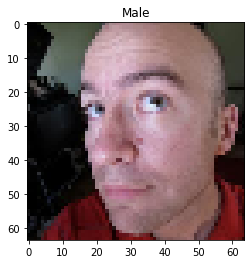

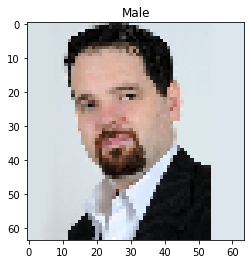

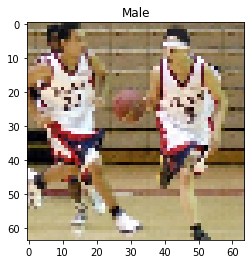

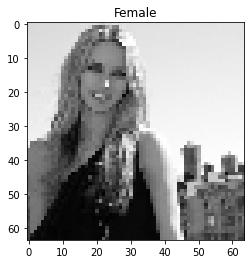

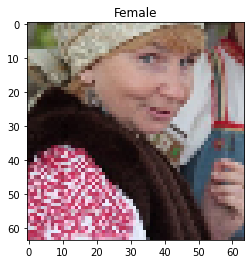

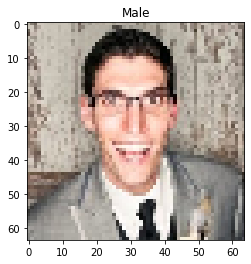

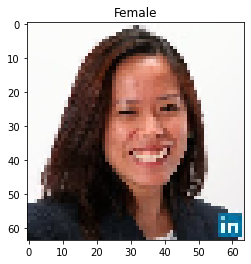

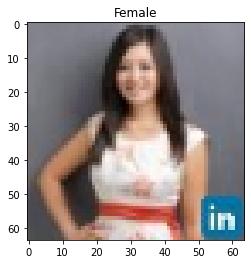

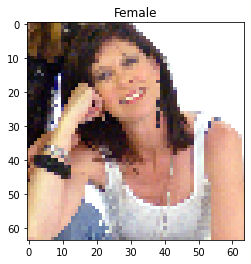

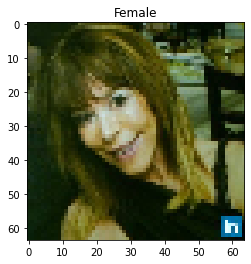

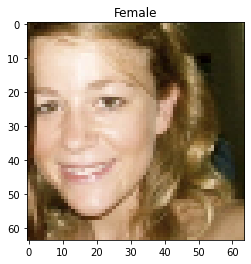

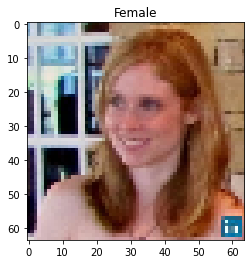

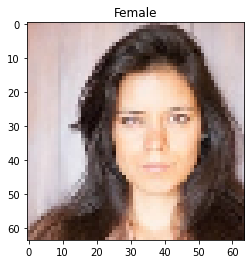

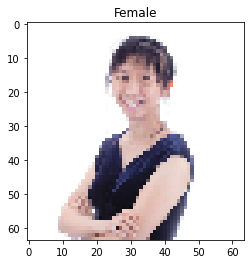

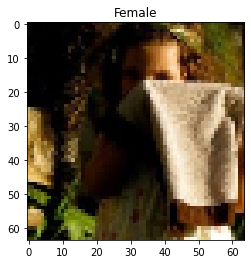

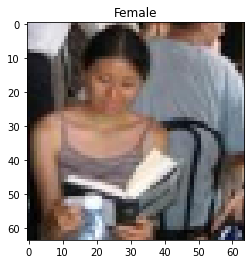

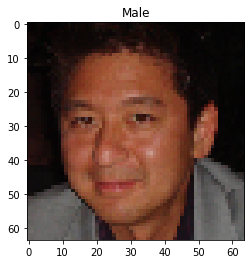

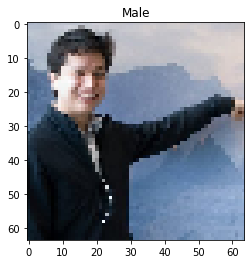

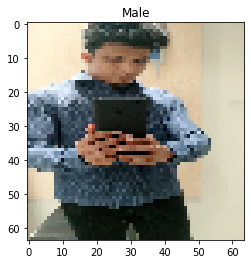

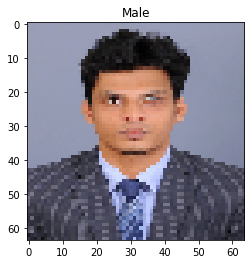

In [5]:
X_train = try_me('./data/')
predict = model.predict_classes(X_train)
for index in range(len(X_train)):
    plt.figure()
    plt.imshow(X_train[index])
    if int(predict[index]) == 0 :
        plt.title('Female')
    else:
        plt.title('Male')

# Model Complexity

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)       